In [7]:
import pandas as pd
data=pd.read_csv("/home/ibab/Downloads/simulated_data_multiple_linear_regression_for_ML.csv")

In [9]:
data.head()

,age,BMI,BP,blood_sugar,Gender,disease_score,disease_score_fluct
0,78,22.862,86.439,90.285,0,890.828,871.203426
1,38,22.413,80.610,90.290,0,789.638,825.044493
2,40,21.752,79.670,86.227,0,772.907,807.954658
3,39,26.339,89.906,84.461,1,808.925,792.264533
4,39,18.539,78.093,89.057,1,771.924,711.895792


In [11]:
data.shape

(60, 7)

In [13]:
data.dtypes

age                      int64
BMI                    float64
BP                     float64
blood_sugar            float64
Gender                   int64
disease_score          float64
disease_score_fluct    float64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  60 non-null     int64  
 1   BMI                  60 non-null     float64
 2   BP                   60 non-null     float64
 3   blood_sugar          60 non-null     float64
 4   Gender               60 non-null     int64  
 5   disease_score        60 non-null     float64
 6   disease_score_fluct  60 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.4 KB


In [17]:
data.isnull().sum()

age                    0
BMI                    0
BP                     0
blood_sugar            0
Gender                 0
disease_score          0
disease_score_fluct    0
dtype: int64

In [19]:
data.describe()

,age,BMI,BP,blood_sugar,Gender,disease_score,disease_score_fluct
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,42.533333,22.063383,85.029583,90.121883,0.483333,813.355133,808.548000
std,21.692353,2.125876,4.338116,3.879848,0.503939,52.030857,70.322423
min,10.000000,18.180000,78.093000,82.555000,0.000000,723.569000,677.362430
25%,21.750000,20.518500,81.361750,87.351250,0.000000,769.854750,762.422842
50%,39.500000,22.109500,85.236500,90.313000,0.000000,812.392000,802.917961
75%,61.250000,23.350250,88.304000,92.423000,1.000000,855.648750,862.675006
max,78.000000,28.094000,95.420000,100.882000,1.000000,914.758000,1024.474577


In [21]:
dupli=data.duplicated()
dupli.sum()

0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'blood_sugar'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'disease_score'}>],
       [<Axes: title={'center': 'disease_score_fluct'}>, <Axes: >,
        <Axes: >]], dtype=object)

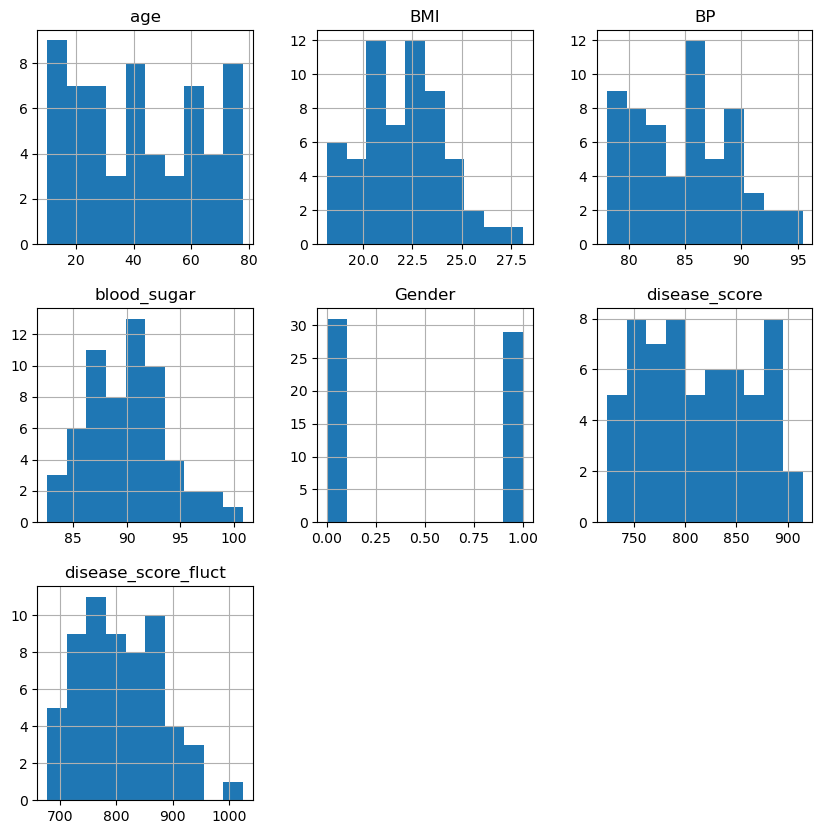

In [25]:
data.hist(figsize=(10,10))

In [66]:
data.columns

Index(['age', 'BMI', 'BP', 'blood_sugar', 'Gender', 'disease_score',
       'disease_score_fluct'],
      dtype='object')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

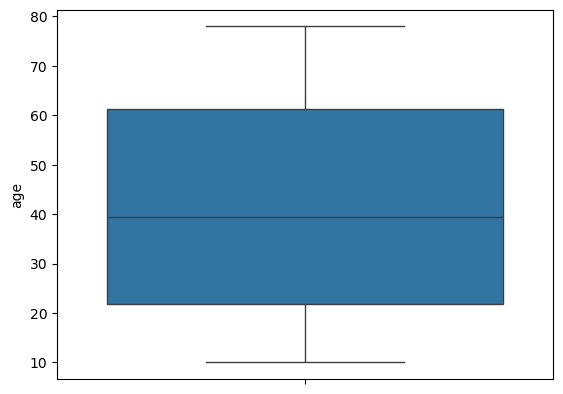

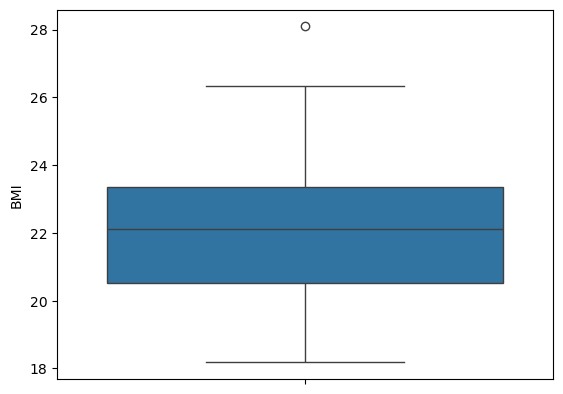

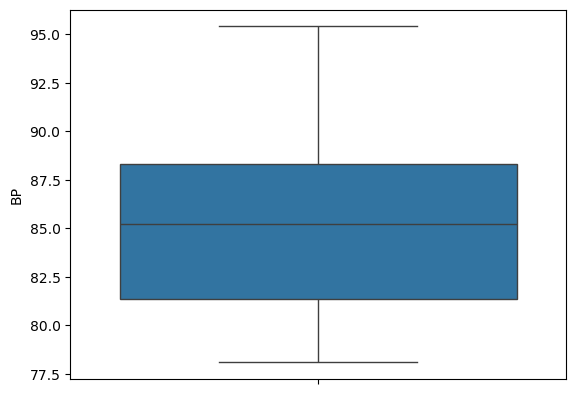

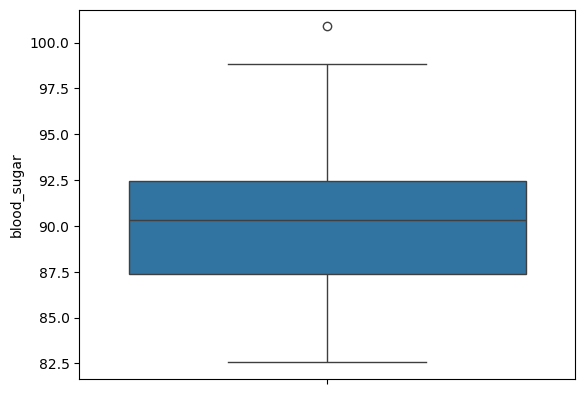

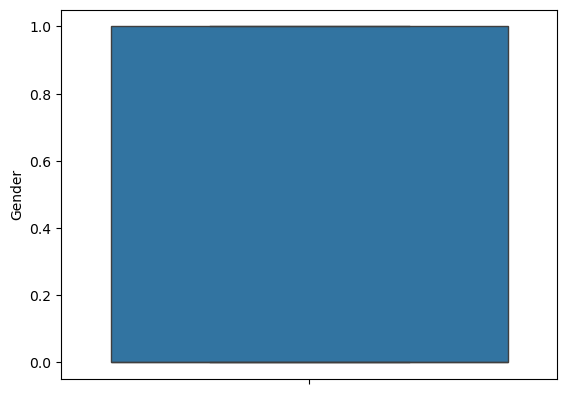

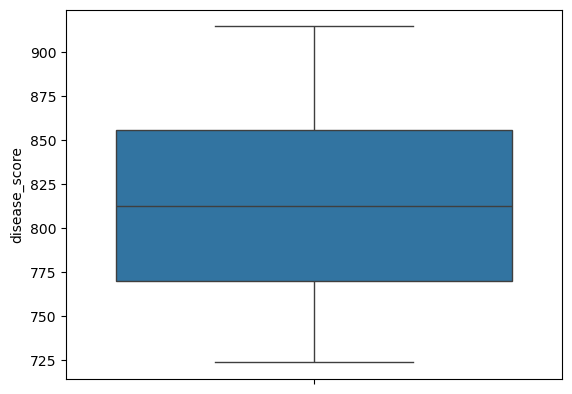

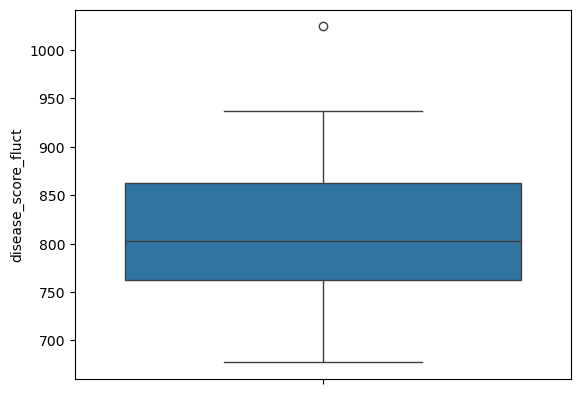

In [104]:
for x in data.columns:
    sns.boxplot(y=data[x])
    plt.show()

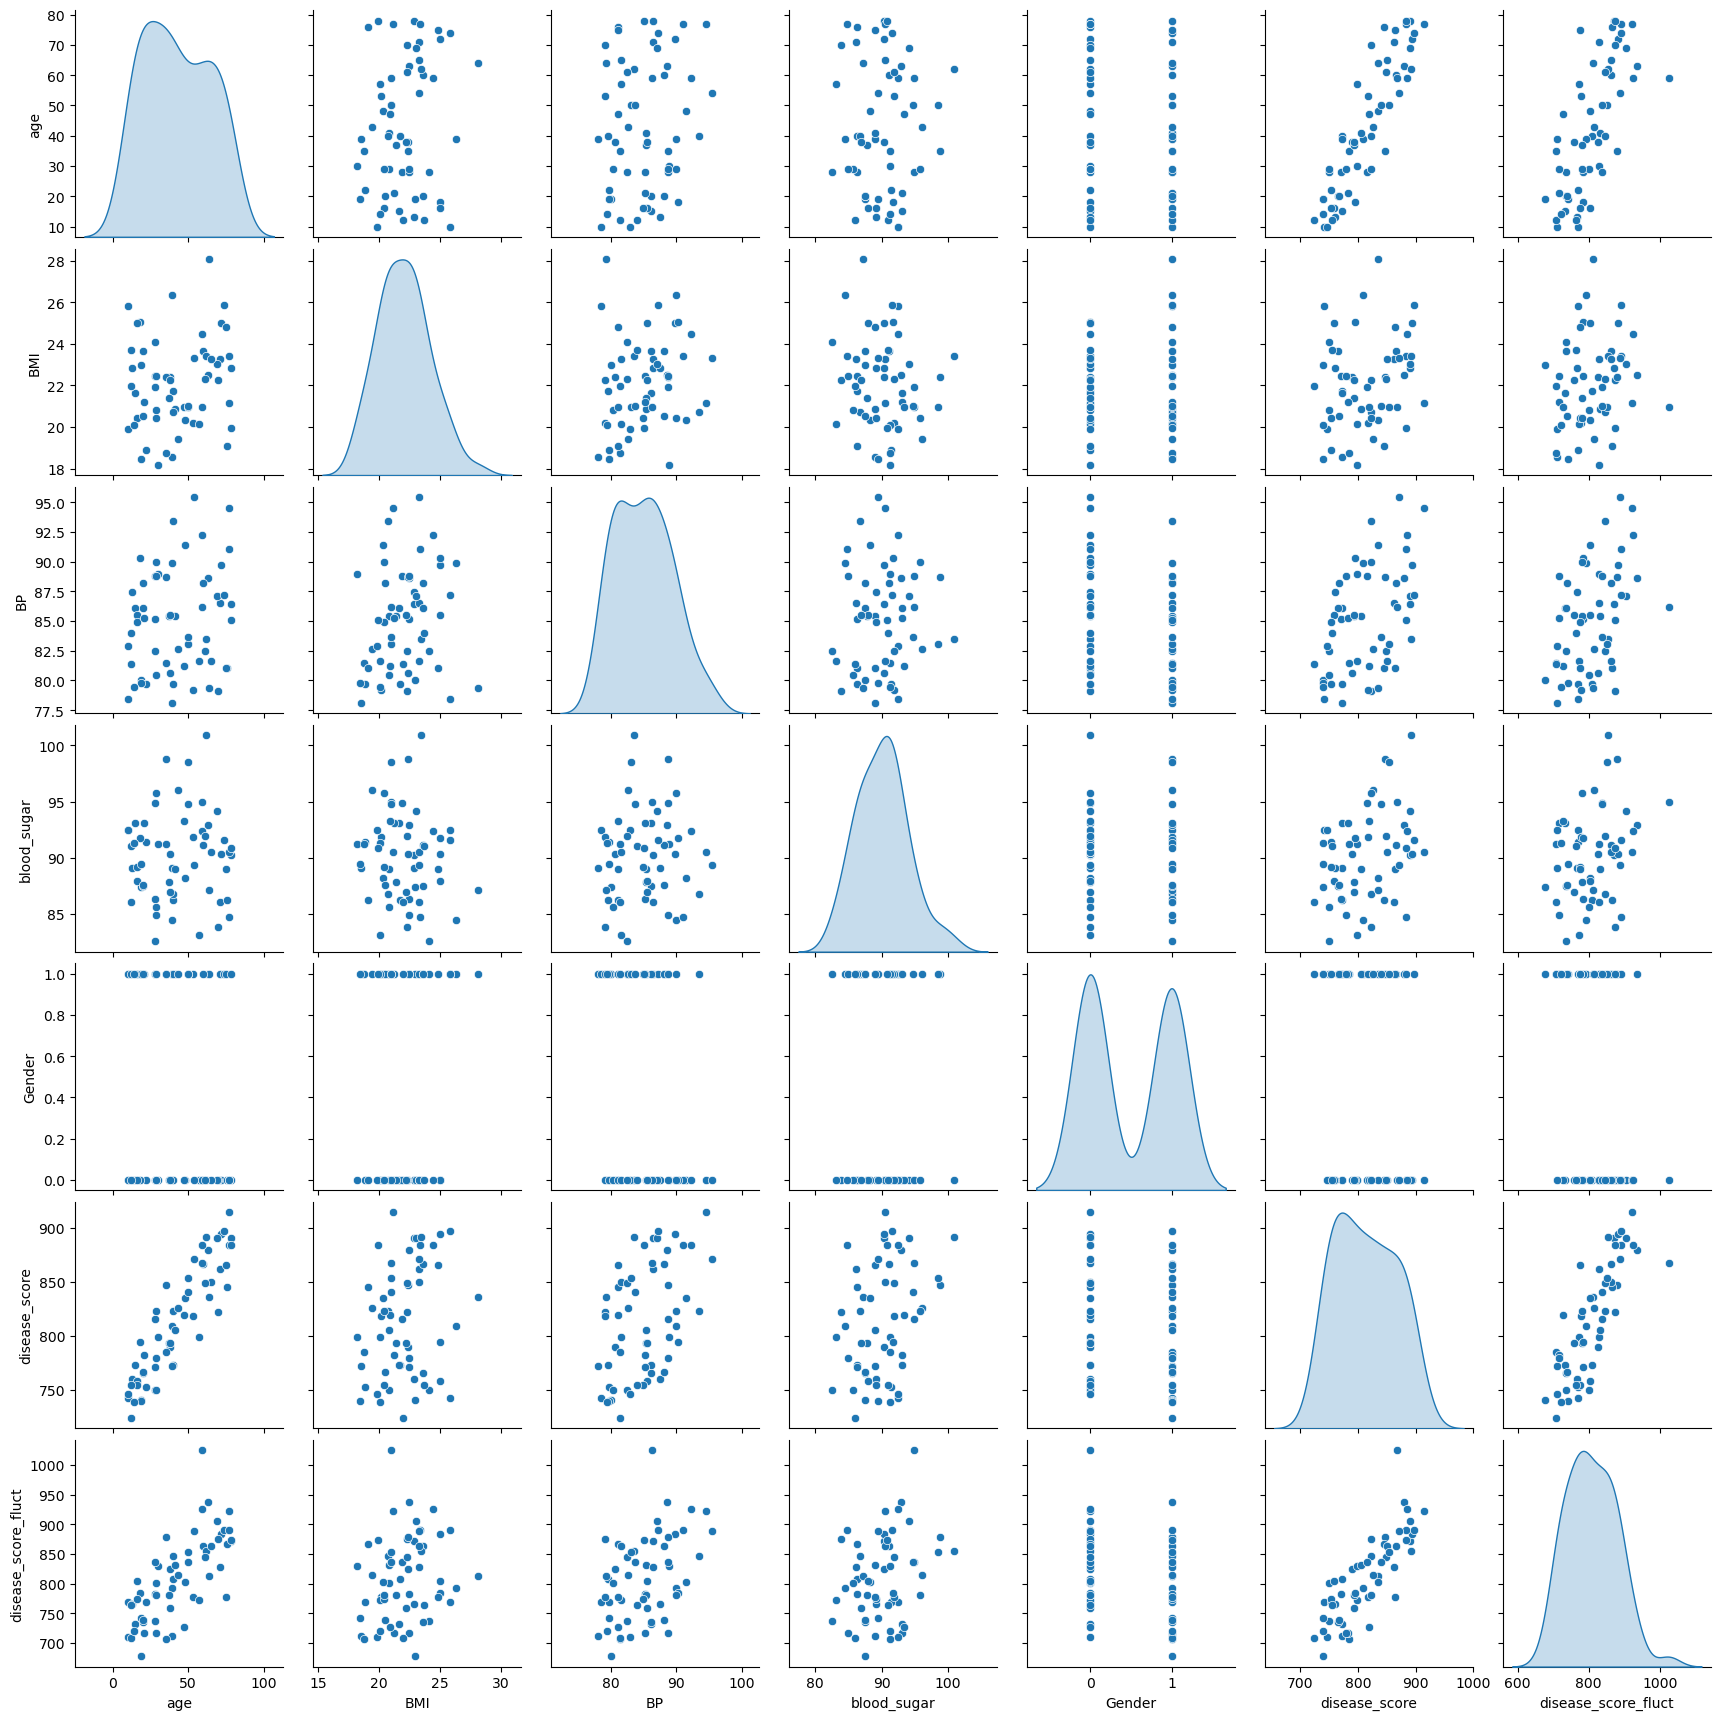

In [120]:
sns.pairplot(data,diag_kind="kde")
plt.show()

In [110]:
data.corr()

,age,BMI,BP,blood_sugar,Gender,disease_score,disease_score_fluct
age,1.000000,0.171919,0.170486,0.019224,-0.135614,0.900642,0.715678
BMI,0.171919,1.000000,0.188875,-0.130222,0.026815,0.233429,0.193256
BP,0.170486,0.188875,1.000000,0.072604,-0.187211,0.467704,0.436657
blood_sugar,0.019224,-0.130222,0.072604,1.000000,-0.057141,0.325359,0.271034
Gender,-0.135614,0.026815,-0.187211,-0.057141,1.000000,-0.173095,-0.286252
disease_score,0.900642,0.233429,0.467704,0.325359,-0.173095,1.000000,0.816458
disease_score_fluct,0.715678,0.193256,0.436657,0.271034,-0.286252,0.816458,1.000000


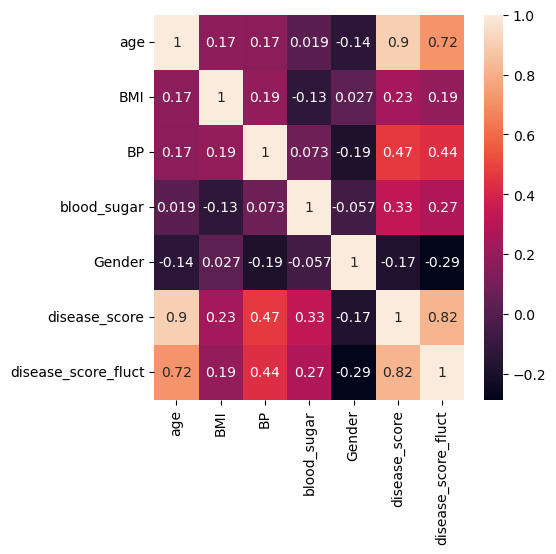

In [116]:
plt.figure(figsize=[5,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [105]:
x=data.drop(['disease_score', 'disease_score_fluct','Gender'], axis=1)
y=data['disease_score']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [109]:
scalar=StandardScaler()
scaler=scalar.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scalar.transform(x_test)

In [111]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)
y_pred=reg_model.predict(x_test)

In [113]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9998980161858847


In [116]:
mean_scaled_train = np.mean(x_train_scaler, axis=0)
print(mean_scaled_train)
std_scaled_train = np.std(x_train_scaler, axis=0)
std_scaled_train

[ 6.34413157e-17 -7.78477811e-16 -4.37216401e-15 -3.21436000e-15]


array([1., 1., 1., 1.])

In [119]:
data.columns

Index(['age', 'BMI', 'BP', 'blood_sugar', 'Gender', 'disease_score',
       'disease_score_fluct'],
      dtype='object')

In [121]:
x=data.drop(['disease_score', 'disease_score_fluct','Gender'], axis=1)
y=data['disease_score_fluct']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=99)
scalar=StandardScaler()
scaler=scalar.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scalar.transform(x_test)
reg_model=LinearRegression()
reg_model.fit(x_train_scaler,y_train)
y_pred=reg_model.predict(x_test_scaler)
r2=r2_score(y_test,y_pred)
print(r2)

0.5359778847780654


In [124]:
x=data.drop(['BMI', 'blood_sugar', 'Gender', 'disease_score','disease_score_fluct'], axis=1)
y=data['disease_score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=99)
scalar=StandardScaler()
scaler=scalar.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scalar.transform(x_test)
reg_model=LinearRegression()
reg_model.fit(x_train_scaler,y_train)
y_pred=reg_model.predict(x_test_scaler)
r2=r2_score(y_test,y_pred)
print(r2)

0.9254104134222216
